# 찾아봐요! 동물의 숲! - 진짜 단포도를 찾아서

## Ready! 이미지 데이터 준비하고 전처리하기

### 데이터 준비하기

In [1]:
#@title
from google.colab import drive
import json
import os

drive.mount('./drive')
path = '/content/drive/MyDrive/kaggle.json'

with open(path) as f:
  api = json.load(f)
  os.environ['KAGGLE_USERNAME'] = api['username']
  os.environ['KAGGLE_KEY'] = api['key']

Mounted at ./drive


In [2]:
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/125

### 데이터 확인하기

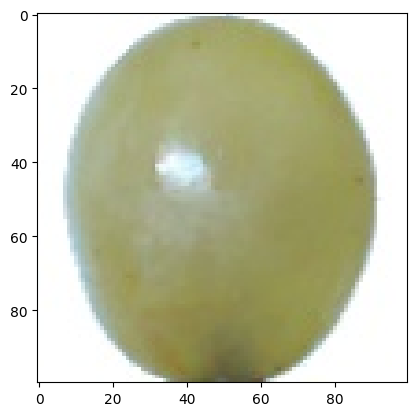

In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

img = load_img('/content/fruits-360_dataset/fruits-360/Training/Grape White/0_100.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()

In [4]:
processed_img = img_to_array(img)
print(processed_img)
print(processed_img.shape)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
(100, 100, 3)


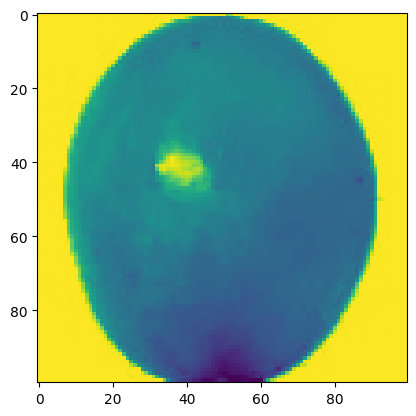

(100, 100, 1)


In [5]:
img = load_img('/content/fruits-360_dataset/fruits-360/Training/Grape White/0_100.jpg', target_size=(100,100), color_mode='grayscale')
plt.imshow(img)
plt.show()
print(img_to_array(img).shape)

### 각 폴더의 모든 이미지 파일 전처리하기

In [6]:
import sys
import os

train_path = '/content/fruits-360_dataset/fruits-360/Training/'
grape_name = ['Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4']


def fileList(dir, format='.jpg'):
  filelist = []
  for root, dirs, files in os.walk(dir, topdown=False):
    for name in files:
      if name.endswith(format):
        fullname = os.path.join(root, name)
        filelist.append(fullname)
    return filelist

In [7]:
import numpy as np

num_img = 0

for name in grape_name:
  my_file_list = fileList(train_path+name)
  num_img = num_img + len(my_file_list)
  print(f'{name}의 이미지 수는 {len(my_file_list)}입니다.')

print(f'총 이미지 수는 {num_img}입니다.')

Grape Blue의 이미지 수는 984입니다.
Grape Pink의 이미지 수는 492입니다.
Grape White의 이미지 수는 490입니다.
Grape White 2의 이미지 수는 490입니다.
Grape White 3의 이미지 수는 492입니다.
Grape White 4의 이미지 수는 471입니다.
총 이미지 수는 3419입니다.


In [8]:
import numpy as np

arr = np.empty((0, 100, 100, 1), int)

for name in grape_name:
  my_file_list = fileList(train_path+name)
  for file_name in my_file_list:
    img = load_img(file_name, target_size=(100,100), color_mode='grayscale')
    img_arr = img_to_array(img)
    arr = np.append(arr, [img_arr], axis=0)

print(arr.shape)
print(arr)

(3419, 100, 100, 1)
[[[[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  ...

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]]


 [[[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  ...

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]]


 [[[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.

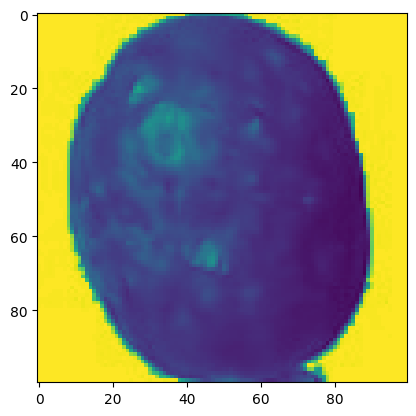

In [17]:
from tensorflow.keras.utils import array_to_img

arr_img = array_to_img(arr[984])
plt.imshow(arr_img)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = arr / 255.
train_target = np.array([0] * 984 + [1] * 492 + [2] * 490 + [3] * 490 + [4] * 492 + [5] * 471)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      shuffle=True, stratify=train_target, test_size=0.3,
                                                                      random_state=34)

print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(2393, 100, 100, 1) (1026, 100, 100, 1)
(2393,) (1026,)


## Make! 이미지 데이터로 합성곱 신경망 모델 만들기

### 합성곱 신경망 모델 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100,100,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
75/75 [==============================] - 36s 462ms/step - loss: 0.4757 - accuracy: 0.8262 - val_loss: 0.0404 - val_accuracy: 0.9795
Epoch 2/20
75/75 [==============================] - 35s 469ms/step - loss: 0.0204 - accuracy: 0.9912 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3/20
75/75 [==============================] - 35s 467ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/20
75/75 [==============================] - 35s 464ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 7.8251e-04 - val_accuracy: 1.0000
Epoch 5/20
75/75 [==============================] - 39s 521ms/step - loss: 4.2304e-04 - accuracy: 1.0000 - val_loss: 3.4190e-04 - val_accuracy: 1.0000
Epoch 6/20
75/75 [==============================] - 36s 482ms/step - loss: 2.5747e-04 - accuracy: 1.0000 - val_loss: 2.7939e-04 - val_accuracy: 1.0000
Epoch 7/20
75/75 [==============================] - 36s 483ms/step - loss: 1.8153e-04 - accuracy: 1.0000 - val_loss: 1.892

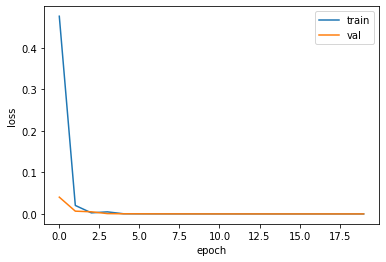

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Predict! 새로운 포도 이미지로 맛 예측하기

### 데이터 준비하기

In [ ]:
test_path = '/content/fruits-360_dataset/fruits-360/Test/'
grape_name = ['Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4']


test_num_img = 0

for name in grape_name:
  my_file_list = fileList(test_path+name)
  test_num_img = test_num_img + len(my_file_list)
  print(f'{name}의 이미지 수는 {len(my_file_list)}입니다.')

print(f'총 이미지 수는 {test_num_img}입니다.')

Grape Blue의 이미지 수는 328입니다.
Grape Pink의 이미지 수는 164입니다.
Grape White의 이미지 수는 166입니다.
Grape White 2의 이미지 수는 166입니다.
Grape White 3의 이미지 수는 164입니다.
Grape White 4의 이미지 수는 158입니다.
총 이미지 수는 1146입니다.


In [ ]:
test_arr = np.empty((0, 100, 100, 1), int)

for name in grape_name:
  my_file_list = fileList(test_path+name)
  for file_name in my_file_list:
    img = load_img(file_name, target_size=(100,100), color_mode='grayscale')
    img_arr = img_to_array(img)
    test_arr = np.append(test_arr, [img_arr], axis=0)

print(test_arr.shape)

(1146, 100, 100, 1)


### 예측 결과 확인하기

In [ ]:
import random

test_arr_scaled = test_arr / 255.
tastes = ['최상급 포도', '단포도', '조금 단 포도', '신포도', '많이 신포도', '못 먹는 포도']

for i in range(10):
  index = random.randint(0, len(test_arr))
  preds_last = model.predict(test_arr_scaled[index:index+1])
  print(f'{index}번째 포도의 예측 인덱스는 {np.argmax(preds_last)} 입니다.')
  print(f'{index}번째 포도는 {tastes[np.argmax(preds_last)]} 입니다.\n')

371번째 포도의 예측 인덱스는 1 입니다.
371번째 포도는 단포도 입니다.

704번째 포도의 예측 인덱스는 3 입니다.
704번째 포도는 신포도 입니다.

263번째 포도의 예측 인덱스는 0 입니다.
263번째 포도는 최상급 포도 입니다.

849번째 포도의 예측 인덱스는 4 입니다.
849번째 포도는 많이 신포도 입니다.

1043번째 포도의 예측 인덱스는 5 입니다.
1043번째 포도는 못 먹는 포도 입니다.

842번째 포도의 예측 인덱스는 4 입니다.
842번째 포도는 많이 신포도 입니다.

1005번째 포도의 예측 인덱스는 5 입니다.
1005번째 포도는 못 먹는 포도 입니다.

350번째 포도의 예측 인덱스는 1 입니다.
350번째 포도는 단포도 입니다.

122번째 포도의 예측 인덱스는 0 입니다.
122번째 포도는 최상급 포도 입니다.

117번째 포도의 예측 인덱스는 0 입니다.
117번째 포도는 최상급 포도 입니다.

